In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\workstation\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [63]:
df = pd.read_csv('Reviews.csv')

In [64]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [65]:
df.shape

(568454, 10)

In [66]:
df = df.sample(frac= 0.20,replace = True).reset_index(drop = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,153796,B005VOOM2W,AFOV2K4F0MDTZ,Zoeeagleeye,2,4,3,1337558400,In the Middle,I really enjoy a coffee package that is so inv...
1,440494,B002ZOCEMG,A2IC9PBHTAYPO,alexandria noggle,0,0,5,1340582400,Love this coffee,How can you complain? It's cheaper than the g...
2,515271,B003WNZ5ZW,ALX4PN3JYHOGI,tom h ficquette,0,0,5,1302825600,Excellent Product,If you enjoy drinking tea in the morning or m...
3,493622,B0000DJ7TL,ATSAX8ZTAX58B,Kevin Blumenstock,6,7,5,1152403200,Now this is my kind of Potato with Steak,I love to order these type of cooked potatoes ...
4,388338,B000FA8SH2,A3VMWY63DNCU7A,josie,0,0,5,1326672000,McVitie's Digestive biscuits,Ilove these biscuits (cookies) they are crispy...


In [67]:
df.shape

(113691, 10)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113687 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113689 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [69]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [70]:
df.dropna(inplace= True)

In [71]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [72]:
rating_pct = df['Score'].value_counts()/len(df) * 100
rating_pct

5    63.610855
4    14.341382
1     9.184149
3     7.694947
2     5.168668
Name: Score, dtype: float64

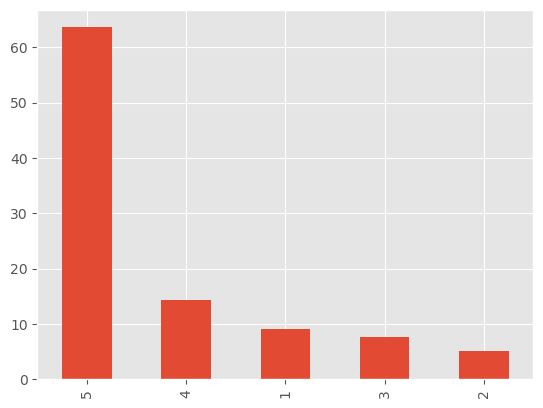

In [73]:
rating_pct.plot.bar()
plt.show()

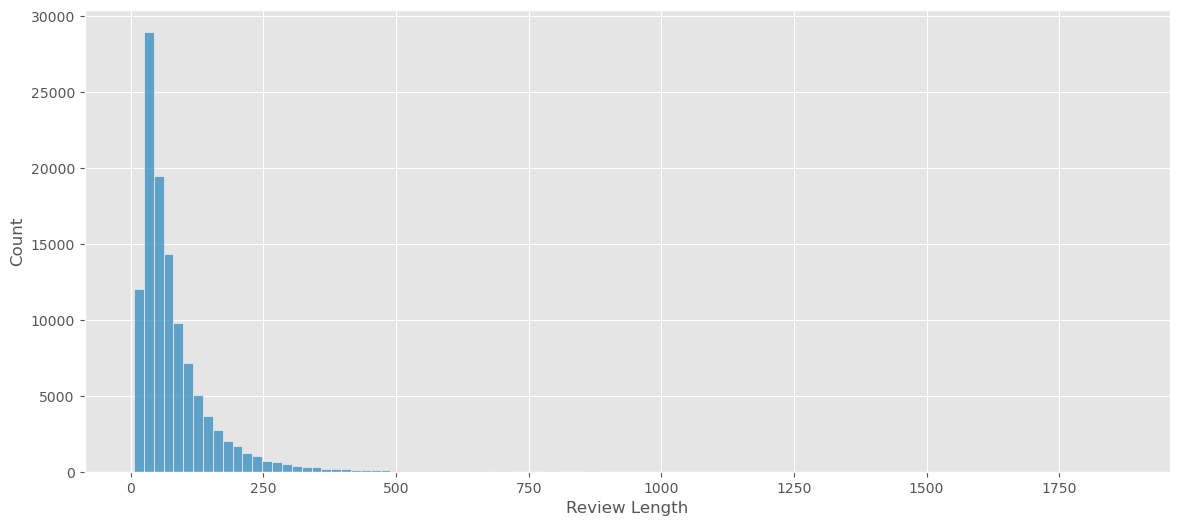

In [74]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

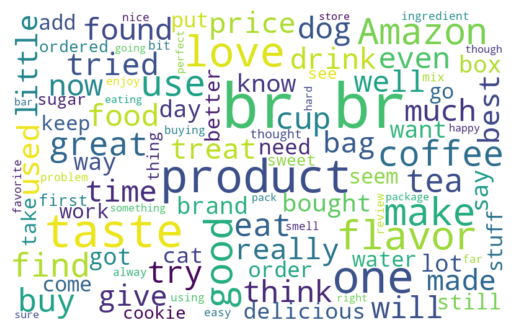

In [75]:
txt = ' '.join(review for review in df.Text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Data Preprocessing and Transformation

In [76]:
df = pd.DataFrame(df,columns = ['Score','Text'])
df.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [77]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [78]:
df['Sentiment'] = df['Rating'].apply(apply_sentiment)
df.drop(['Rating'],axis = 1, inplace = True)

In [79]:
sentiment = df['Sentiment'].value_counts()
sentiment

1    97368
0    16317
Name: Sentiment, dtype: int64

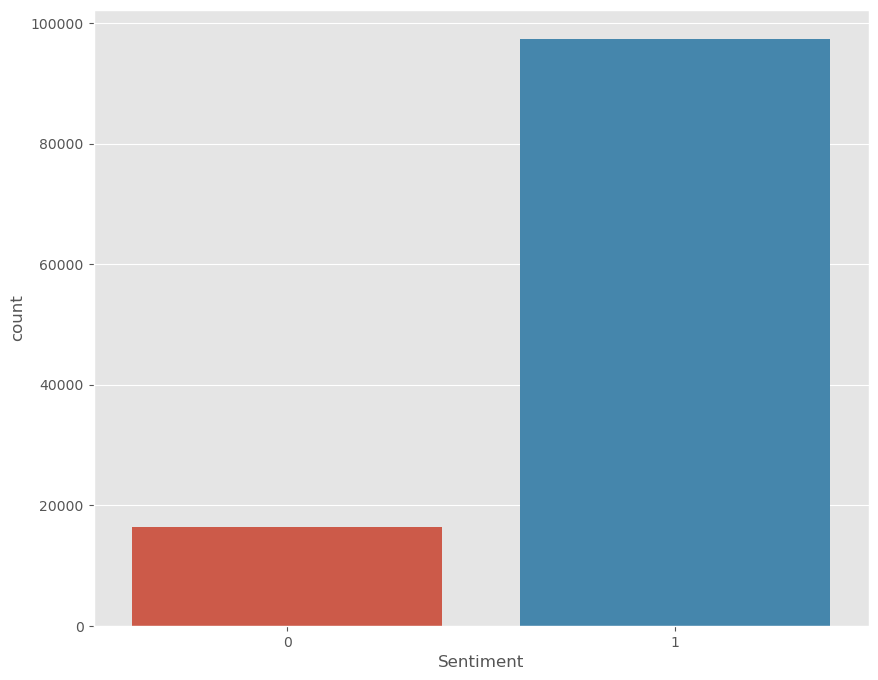

In [80]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

In [81]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [82]:
df['Review'] = df['Review'].apply(clean_text)

In [83]:
df.head()

,Review,Sentiment
0,i really enjoy a coffee package that is so inv...,1
1,how can you complain its cheaper than the gro...,1
2,if you enjoy drinking tea in the morning or m...,1
3,i love to order these type of cooked potatoes ...,1
4,ilove these biscuits cookies they are crispy ...,1


In [84]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df['reviews_text'] = df['Review'].apply(lambda row: remove_stopword(stop_words, row))

In [85]:
df.head(3)

,Review,Sentiment,reviews_text
0,i really enjoy a coffee package that is so inv...,1,"[really, enjoy, coffee, package, inviting, soc..."
1,how can you complain its cheaper than the gro...,1,"[complain, cheaper, grocery, store, shipped, d..."
2,if you enjoy drinking tea in the morning or m...,1,"[enjoy, drinking, tea, morning, time, day, pro..."


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((454763, 9), (113691, 9), (454763,))

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [88]:
X = df['reviews_text']
y = df['Sentiment']

In [119]:
# Create a pipeline for text classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('clf', MultinomialNB()),
])

try:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
     # Compute accuracies
    train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print("Training accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test,y_pred))

    print(confusion_matrix(y_test,y_pred))
    
except ValueError as e:
    print("Error:", e)

Error: Found input variables with inconsistent numbers of samples: [9, 454763]
